# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [997]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [998]:
df = pd.read_csv("./data-classification/clustered_data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2455 non-null   object 
 1   StockCode    2455 non-null   object 
 2   Description  2455 non-null   object 
 3   Quantity     2455 non-null   int64  
 4   InvoiceDate  2455 non-null   object 
 5   UnitPrice    2455 non-null   float64
 6   CustomerID   2455 non-null   float64
 7   Country      2455 non-null   object 
 8   Cluster      2455 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 172.7+ KB


In [1000]:
df.describe()

,Quantity,UnitPrice,CustomerID,Cluster
count,2455.000000,2455.000000,2455.000000,2455.000000
mean,10.286354,3.715283,16162.089613,0.335234
std,29.332507,12.437070,1902.680289,0.924867
min,0.000000,0.000000,12431.000000,0.000000
25%,1.000000,1.250000,14688.000000,0.000000
50%,3.000000,2.510000,16539.000000,0.000000
75%,10.000000,4.210000,17968.000000,0.000000
max,600.000000,569.770000,18229.000000,3.000000


In [1001]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Cluster        0
dtype: int64

In [1002]:
df.isna().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [1003]:
df.Cluster.value_counts()

Cluster
0    2151
3     257
1      42
2       5
Name: count, dtype: int64

In [1004]:
data = df.drop(columns=['InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID', 'Description'])
data.head()

,Quantity,UnitPrice,Country,Cluster
0,6,2.55,United Kingdom,0
1,6,3.39,United Kingdom,0
2,8,2.75,United Kingdom,0
3,6,3.39,United Kingdom,0
4,6,3.39,United Kingdom,0


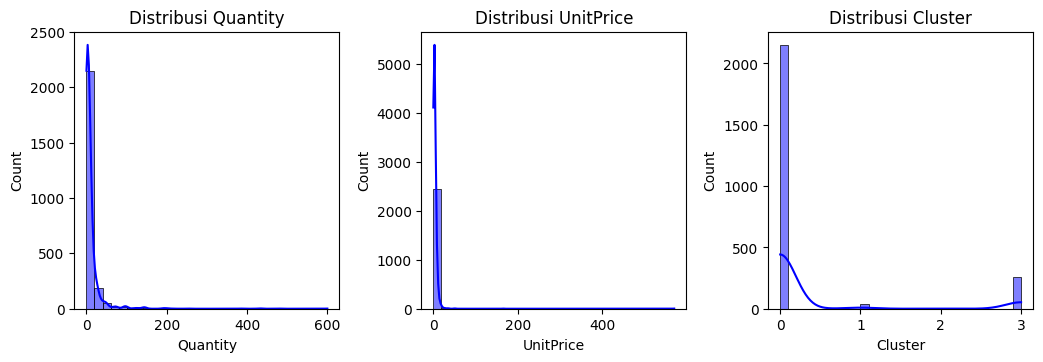

In [1005]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

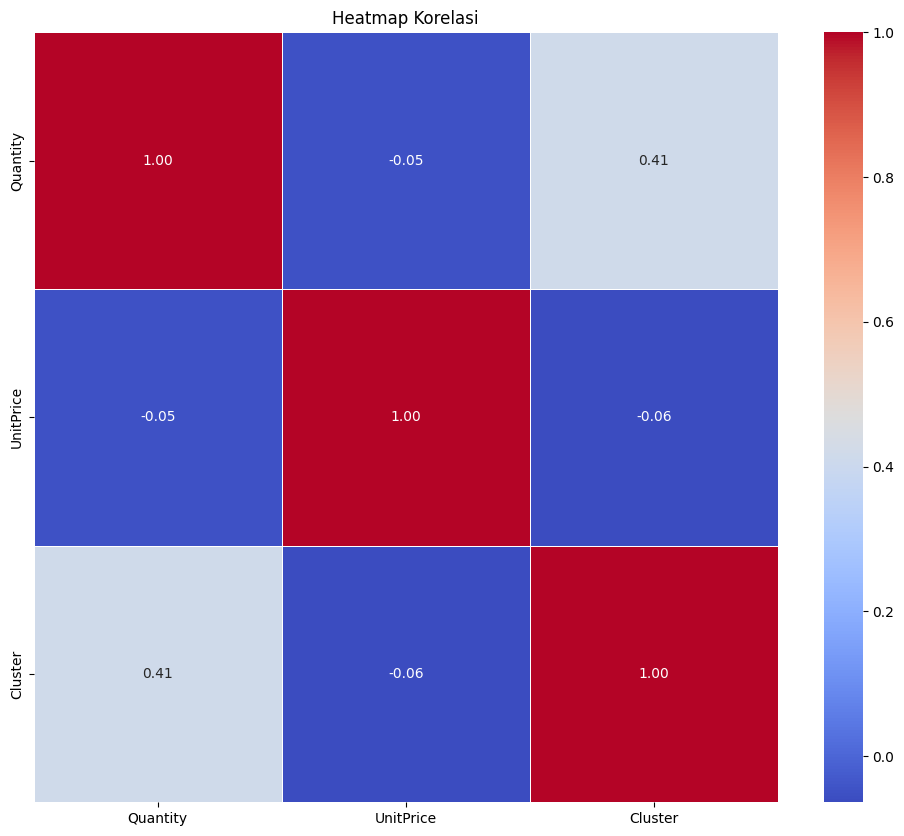

In [1006]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

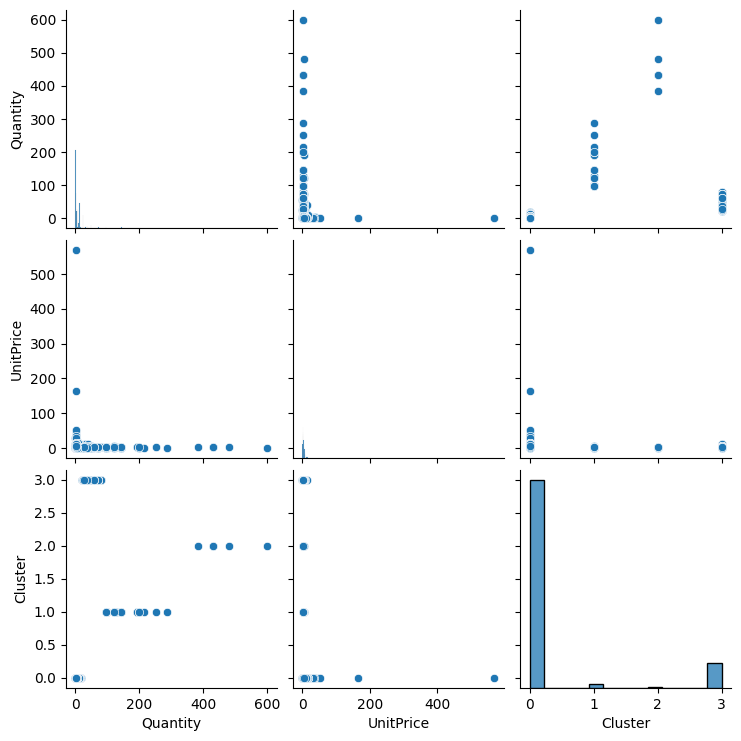

In [1007]:
sns.pairplot(num_features)
plt.show()

C:\Users\risma\AppData\Local\Temp\ipykernel_17592\3088100072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=data, palette='viridis')


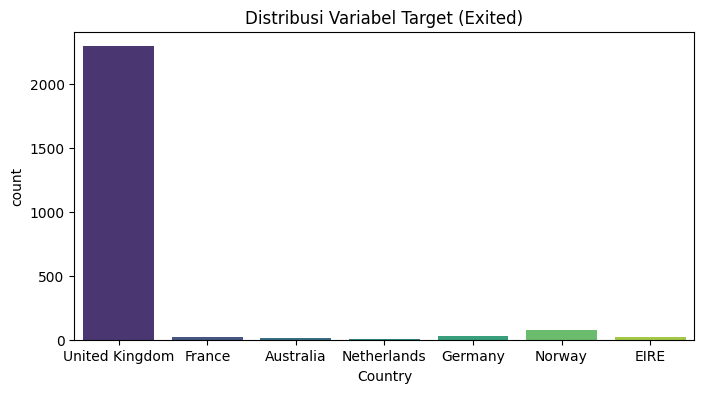

In [1008]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Country', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

In [1009]:
label_encoder = LabelEncoder()
categorical_columns = ['Country']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [1010]:
scaler = MinMaxScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns  # Select numeric features
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])  # Scale features only
X = data.drop(columns=['Country'])
y = data['Country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
data.info()

Training set shape: X_train=(1964, 3), y_train=(1964,)
Test set shape: X_test=(491, 3), y_test=(491,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   2455 non-null   int64  
 1   UnitPrice  2455 non-null   float64
 2   Country    2455 non-null   int64  
 3   Cluster    2455 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 76.8 KB


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [1011]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

- Algoritma Random Forest :  algoritma machine learning yang sering digunakan dalam tugas klasifikasi dan regresi. Struktur dari algoritma ini mirip dengan bentuk pohon dengan setiap cabang mewakili keputusan atau percabangan dari data berdasarkan fitur-fitur yang ada. 

-  algoritma ensemble learning yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting. Setiap pohon dalam Random Forest dilatih menggunakan subset acak dari data pelatihan dan subset acak dari fitur yang tersedia. Hasil akhir prediksi ditentukan melalui voting (untuk klasifikasi) atau rata-rata (untuk regresi) dari hasil semua pohon dalam model.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [1012]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),   
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

    return results

results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score']
    })
    
summary_df = pd.DataFrame(rows)
 
print(summary_df)

                Model  Accuracy  F1-Score
0  Decision Tree (DT)  0.922607  0.911378
1  Random Forest (RF)  0.926680  0.914490


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

- Algoritma Decision Tree yang digunakan menunjukkan dapat memberi akurasi sebesar 92.26% dan F1-Score sebesar 91.13%
- Algoritma Random Forest memperoleh akurasi sebesar 92.66% dan F1-Score sebesar 91.44%

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [1013]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [1014]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil dari evaluasi model klasifikasi yang telah digunakan menunjukkan bahwa algoritma decision tree dan random forest memiliki tingkat akurasi dan F1-Score yang tinggi yang mengindikasikan bahwa kedua algoritma memiliki performa yang baik